In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

In [3]:
stress_df1 = pd.read_csv('C:/Users/Acer/Desktop/my all projects/Student Stress dataset/StressLevelDataset.csv')
print(stress_df1.shape)
stress_df1.head()

(1100, 21)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


In [4]:
stress_df2 = pd.read_csv('C:/Users/Acer/Desktop/my all projects/Student Stress dataset/Stress_Dataset.csv')
print(stress_df2.shape)
stress_df2.head()

(843, 26)


,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,Have you been feeling sadness or low mood?,Have you been experiencing any illness or health issues?,Do you often feel lonely or isolated?,Do you feel overwhelmed with your academic workload?,"Are you in competition with your peers, and does it affect you?",Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,2,3,1,5,1,2,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,2,1,2,1,2,4,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,3,2,3,4,5,2,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,5,2,4,1,2,3,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,4,1,1,1,2,1,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [5]:
print(stress_df1.isna().sum())
print(stress_df2.isna().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64
Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?

## Data Cleaning and Preprocessing

In [6]:
# Identify and drop duplicate columns in stress_df2 (e.g., duplicate question)
duplicate_columns = [col for col in stress_df2.columns if '1' in col]
if duplicate_columns:
    print(f'Dropping duplicate columns: {duplicate_columns}')
    stress_df2.drop(columns=duplicate_columns, inplace=True)
else:
    print('No duplicate columns found in Stress_Dataset.')

# Reset indices if necessary and show the new column headers
stress_df2.reset_index(drop=True, inplace=True)
print('Columns in Stress_Dataset after cleaning:')
print(stress_df2.columns.tolist())

Dropping duplicate columns: ['Have you been dealing with anxiety or tension recently?.1']
Columns in Stress_Dataset after cleaning:
['Gender', 'Age', 'Have you recently experienced stress in your life?', 'Have you noticed a rapid heartbeat or palpitations?', 'Have you been dealing with anxiety or tension recently?', 'Do you face any sleep problems or difficulties falling asleep?', 'Have you been getting headaches more often than usual?', 'Do you get irritated easily?', 'Do you have trouble concentrating on your academic tasks?', 'Have you been feeling sadness or low mood?', 'Have you been experiencing any illness or health issues?', 'Do you often feel lonely or isolated?', 'Do you feel overwhelmed with your academic workload?', 'Are you in competition with your peers, and does it affect you?', 'Do you find that your relationship often causes you stress?', 'Are you facing any difficulties with your professors or instructors?', 'Is your working environment unpleasant or stressful?', 'Do 

In [18]:
stress_df2.shape

(843, 25)

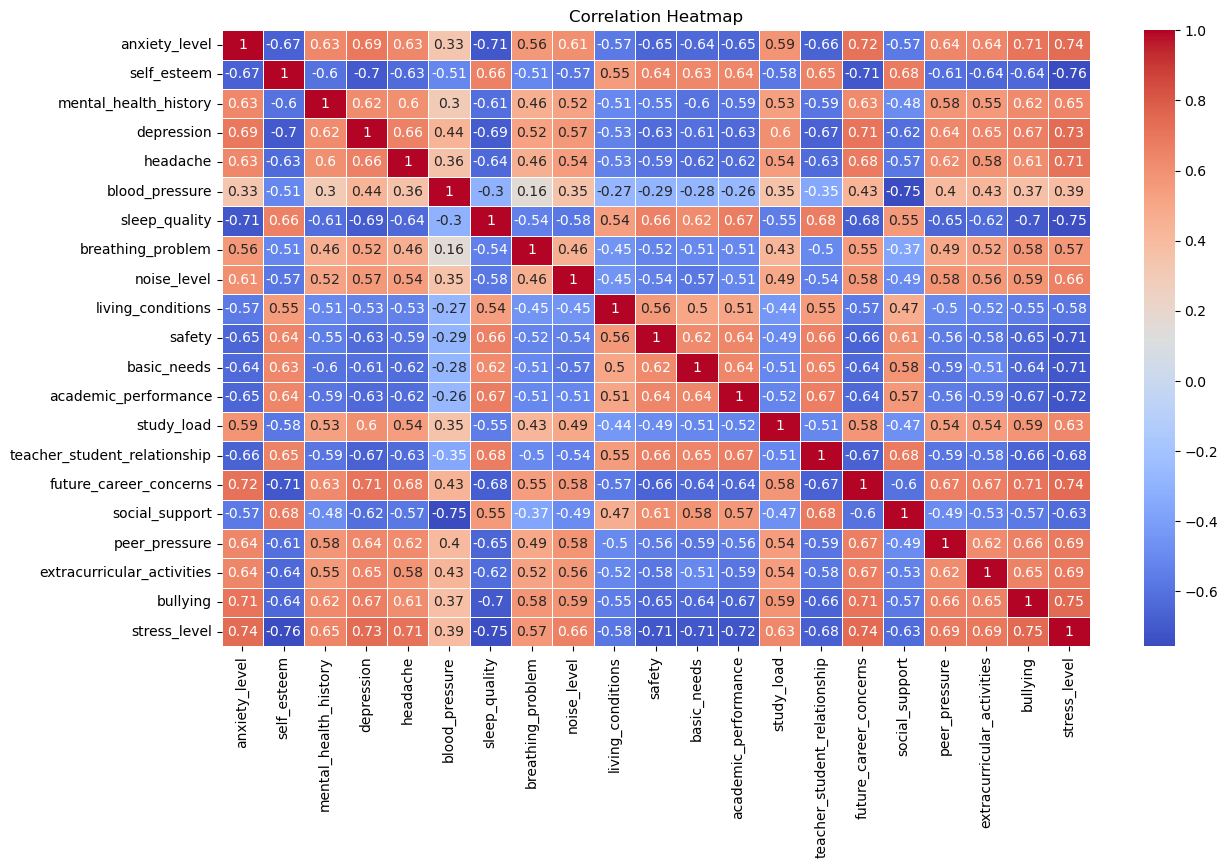

In [8]:
# Convert all column names to snake_case and remove extra spaces
import re

stress_df2.columns = (
    stress_df2.columns
    .str.strip()                                 # remove leading/trailing spaces
    .str.lower()                                 # lowercase
    .str.replace(r'[^\w\s]', '', regex=True)     # remove punctuation like '?', '.', etc.
    .str.replace(r'\s+', '_', regex=True)        # replace spaces with underscore
)
stress_df2.head()

,gender,age,have_you_recently_experienced_stress_in_your_life,have_you_noticed_a_rapid_heartbeat_or_palpitations,have_you_been_dealing_with_anxiety_or_tension_recently,do_you_face_any_sleep_problems_or_difficulties_falling_asleep,have_you_been_getting_headaches_more_often_than_usual,do_you_get_irritated_easily,do_you_have_trouble_concentrating_on_your_academic_tasks,have_you_been_feeling_sadness_or_low_mood,have_you_been_experiencing_any_illness_or_health_issues,do_you_often_feel_lonely_or_isolated,do_you_feel_overwhelmed_with_your_academic_workload,are_you_in_competition_with_your_peers_and_does_it_affect_you,do_you_find_that_your_relationship_often_causes_you_stress,are_you_facing_any_difficulties_with_your_professors_or_instructors,is_your_working_environment_unpleasant_or_stressful,do_you_struggle_to_find_time_for_relaxation_and_leisure_activities,is_your_hostel_or_home_environment_causing_you_difficulties,do_you_lack_confidence_in_your_academic_performance,do_you_lack_confidence_in_your_choice_of_academic_subjects,academic_and_extracurricular_activities_conflicting_for_you,do_you_attend_classes_regularly,have_you_gainedlost_weight,which_type_of_stress_do_you_primarily_experience
0,0,20,3,4,2,5,2,1,2,2,3,1,5,1,2,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,4,2,1,2,1,2,4,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,3,4,2,3,2,3,4,5,2,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,3,4,3,5,2,4,1,2,3,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,4,4,4,4,1,1,1,2,1,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [9]:
stress_df2.which_type_of_stress_do_you_primarily_experience.value_counts()

which_type_of_stress_do_you_primarily_experience
Eustress (Positive Stress) - Stress that motivates and enhances performance.       768
No Stress - Currently experiencing minimal to no stress.                            43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     32
Name: count, dtype: int64

In [10]:
le = LabelEncoder()

In [11]:
stress_df2['stress_type_encoded'] = le.fit_transform(stress_df2['which_type_of_stress_do_you_primarily_experience'])

In [12]:
X = stress_df2.drop(['which_type_of_stress_do_you_primarily_experience', 'stress_type_encoded'], axis=1)
y = stress_df2['stress_type_encoded']

In [13]:
stress_df2.stress_type_encoded.value_counts()

stress_type_encoded
1    768
2     43
0     32
Name: count, dtype: int64

In [14]:
print(le.classes_)

['Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.'
 'Eustress (Positive Stress) - Stress that motivates and enhances performance.'
 'No Stress - Currently experiencing minimal to no stress.']


In [15]:
stress_df2 = stress_df2.drop('which_type_of_stress_do_you_primarily_experience', axis=1)
stress_df2.head()

,gender,age,have_you_recently_experienced_stress_in_your_life,have_you_noticed_a_rapid_heartbeat_or_palpitations,have_you_been_dealing_with_anxiety_or_tension_recently,do_you_face_any_sleep_problems_or_difficulties_falling_asleep,have_you_been_getting_headaches_more_often_than_usual,do_you_get_irritated_easily,do_you_have_trouble_concentrating_on_your_academic_tasks,have_you_been_feeling_sadness_or_low_mood,have_you_been_experiencing_any_illness_or_health_issues,do_you_often_feel_lonely_or_isolated,do_you_feel_overwhelmed_with_your_academic_workload,are_you_in_competition_with_your_peers_and_does_it_affect_you,do_you_find_that_your_relationship_often_causes_you_stress,are_you_facing_any_difficulties_with_your_professors_or_instructors,is_your_working_environment_unpleasant_or_stressful,do_you_struggle_to_find_time_for_relaxation_and_leisure_activities,is_your_hostel_or_home_environment_causing_you_difficulties,do_you_lack_confidence_in_your_academic_performance,do_you_lack_confidence_in_your_choice_of_academic_subjects,academic_and_extracurricular_activities_conflicting_for_you,do_you_attend_classes_regularly,have_you_gainedlost_weight,stress_type_encoded
0,0,20,3,4,2,5,2,1,2,2,3,1,5,1,2,3,1,4,1,2,1,3,1,2,1
1,0,20,2,3,2,1,1,1,4,2,1,2,1,2,4,3,2,1,1,3,2,1,4,2,1
2,0,20,5,4,2,2,3,4,2,3,2,3,4,5,2,2,2,2,1,4,1,1,2,1,1
3,1,20,3,4,3,2,3,4,3,5,2,4,1,2,3,1,1,2,1,2,1,1,5,3,1
4,0,20,3,3,3,2,4,4,4,4,1,1,1,2,1,2,3,1,2,2,4,2,2,2,1


In [16]:
stress_df2.have_you_been_dealing_with_anxiety_or_tension_recently.value_counts()

have_you_been_dealing_with_anxiety_or_tension_recently
2    247
3    217
1    193
4    124
5     62
Name: count, dtype: int64

## Visualizations and Exploratory Data Analysis

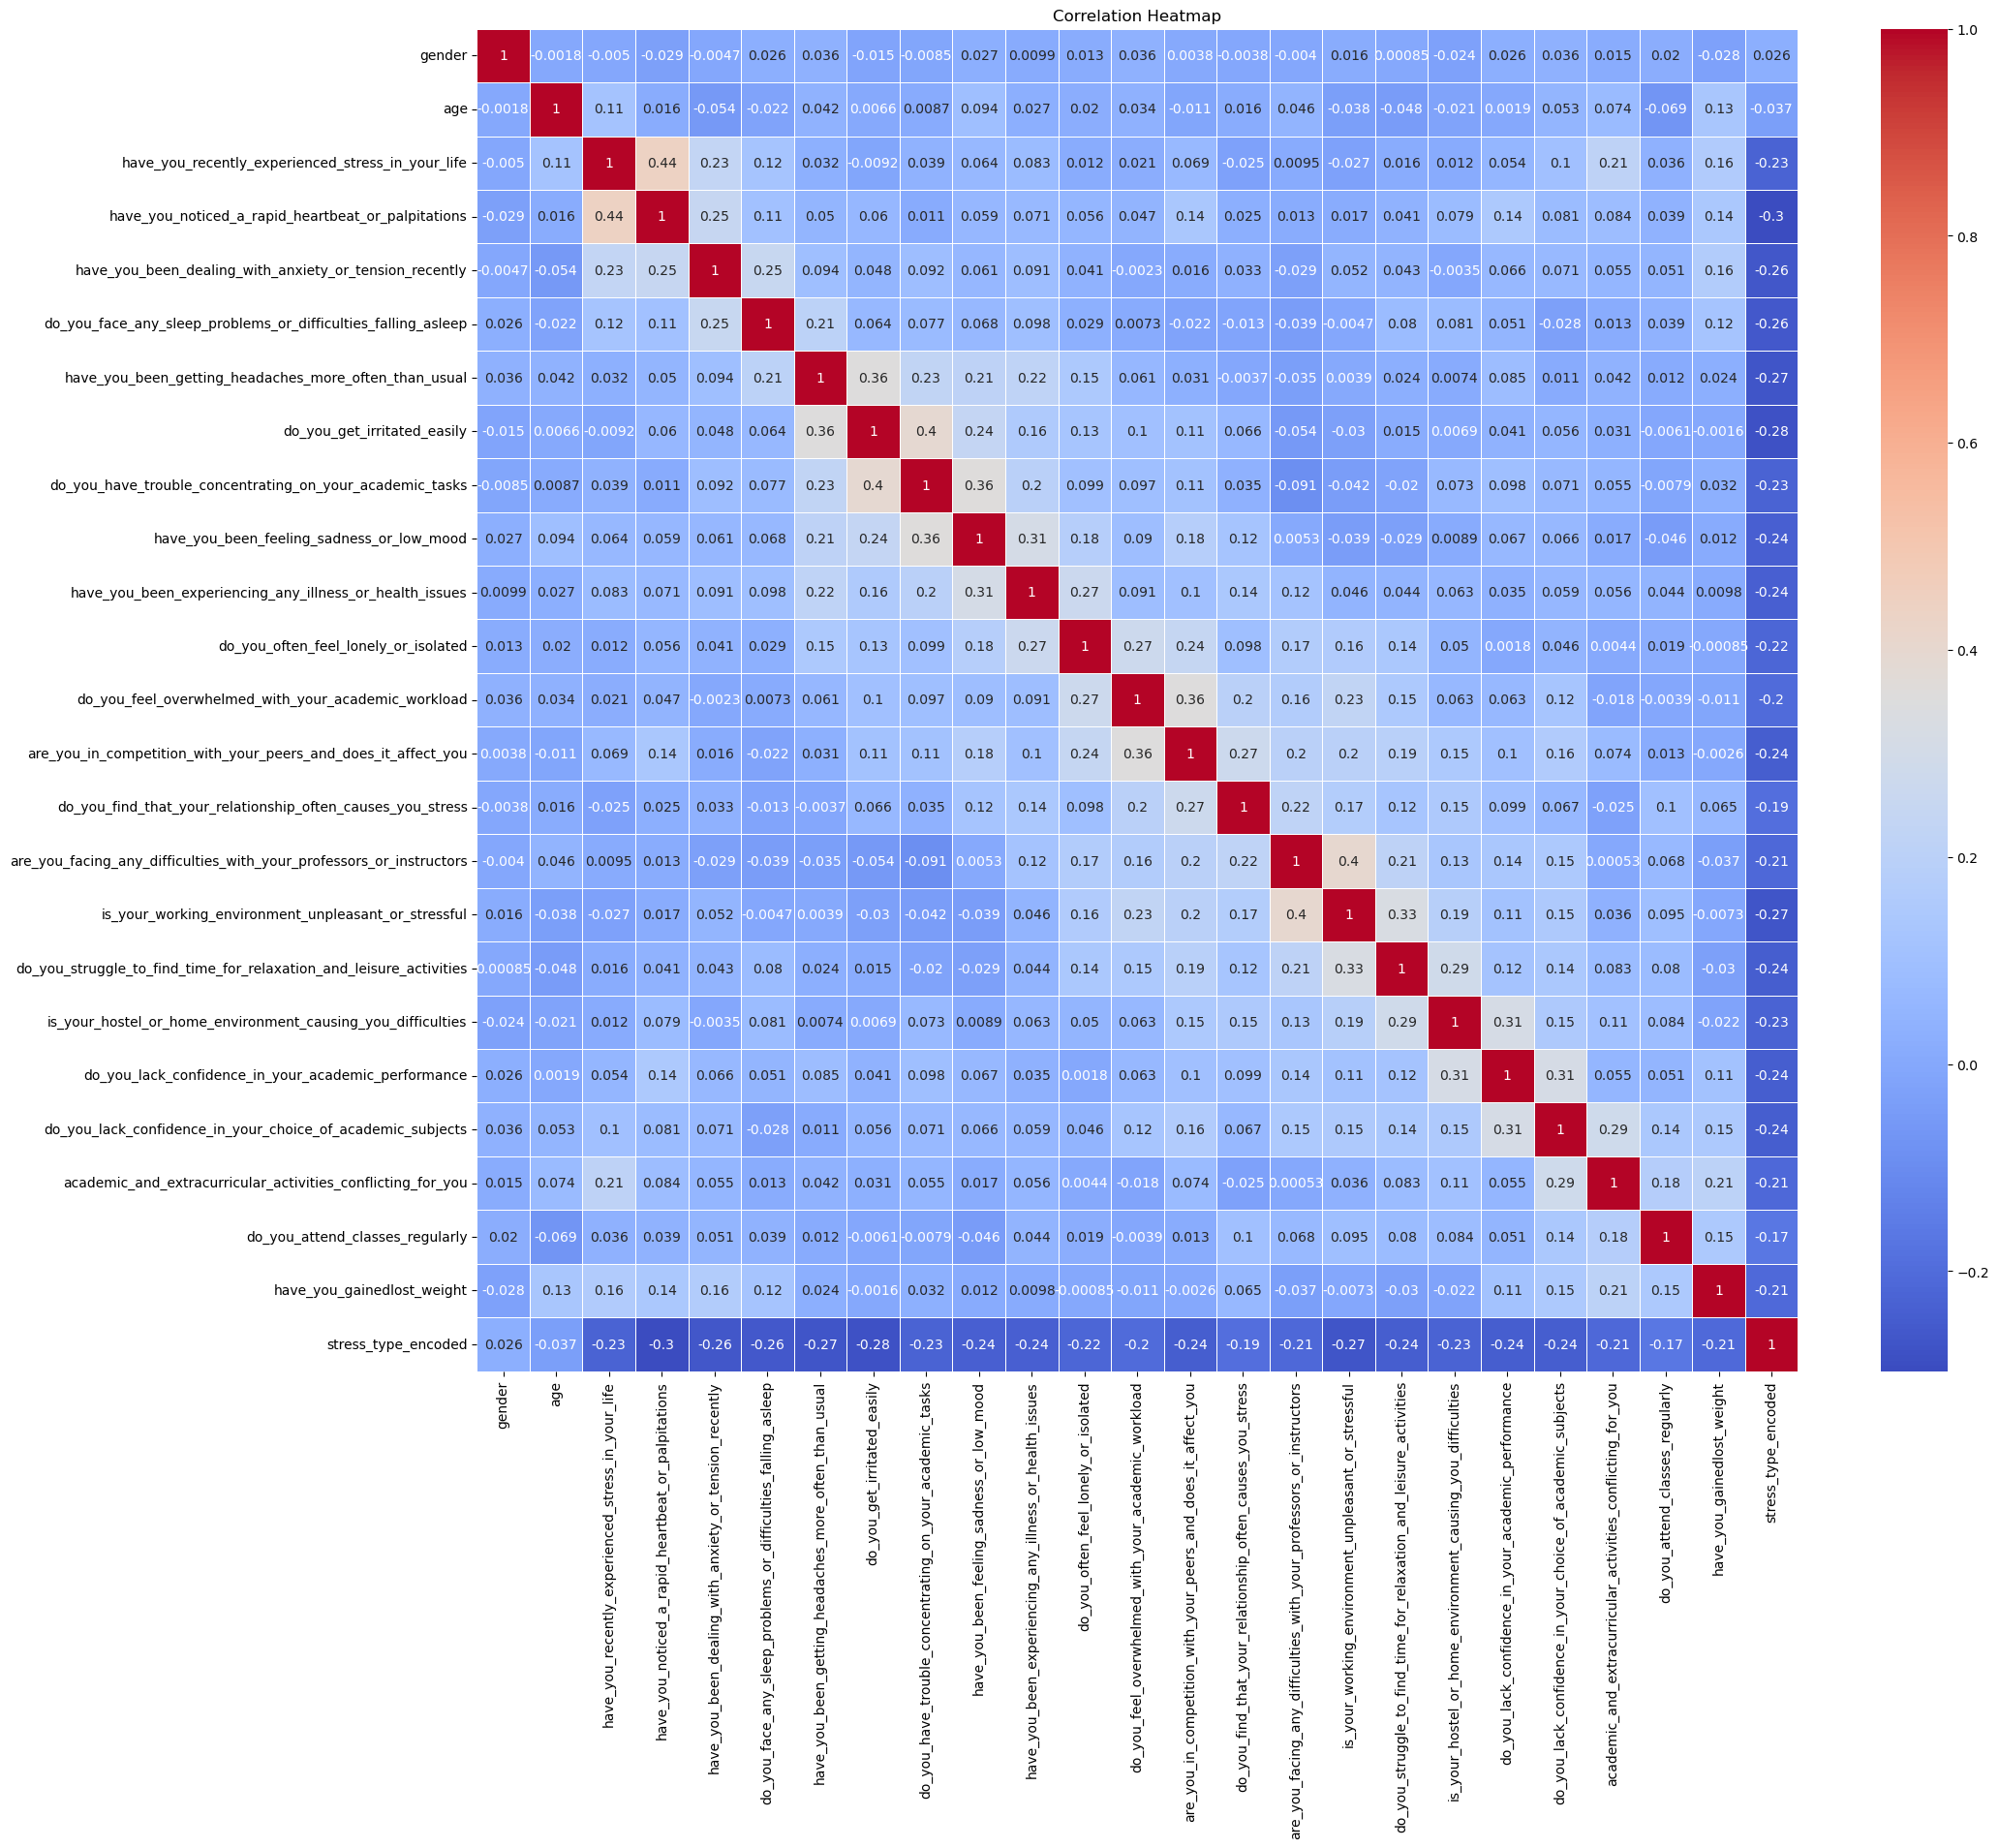

In [17]:
plt.figure(figsize=(22, 18))  # optional, controls the size
sns.heatmap(stress_df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

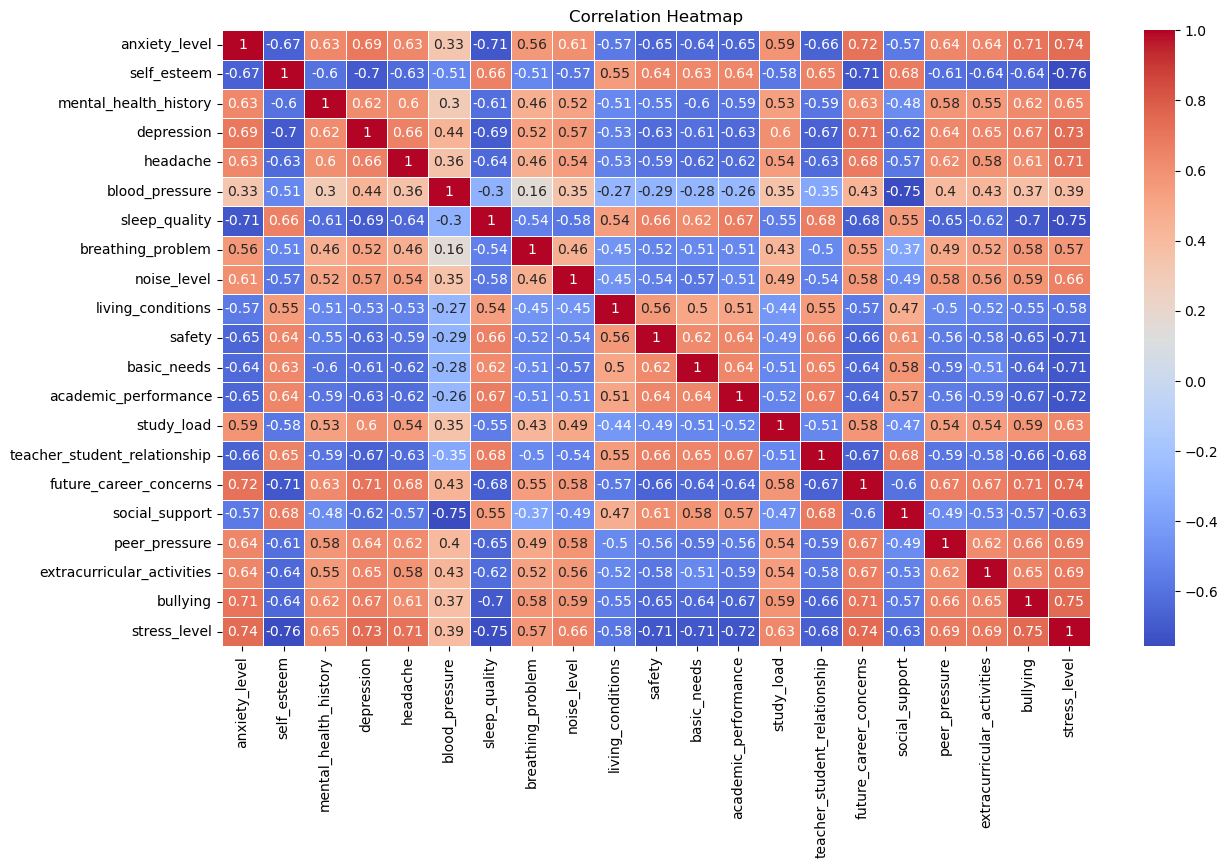

In [23]:
plt.figure(figsize=(14, 8))  # optional, controls the size
sns.heatmap(stress_df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

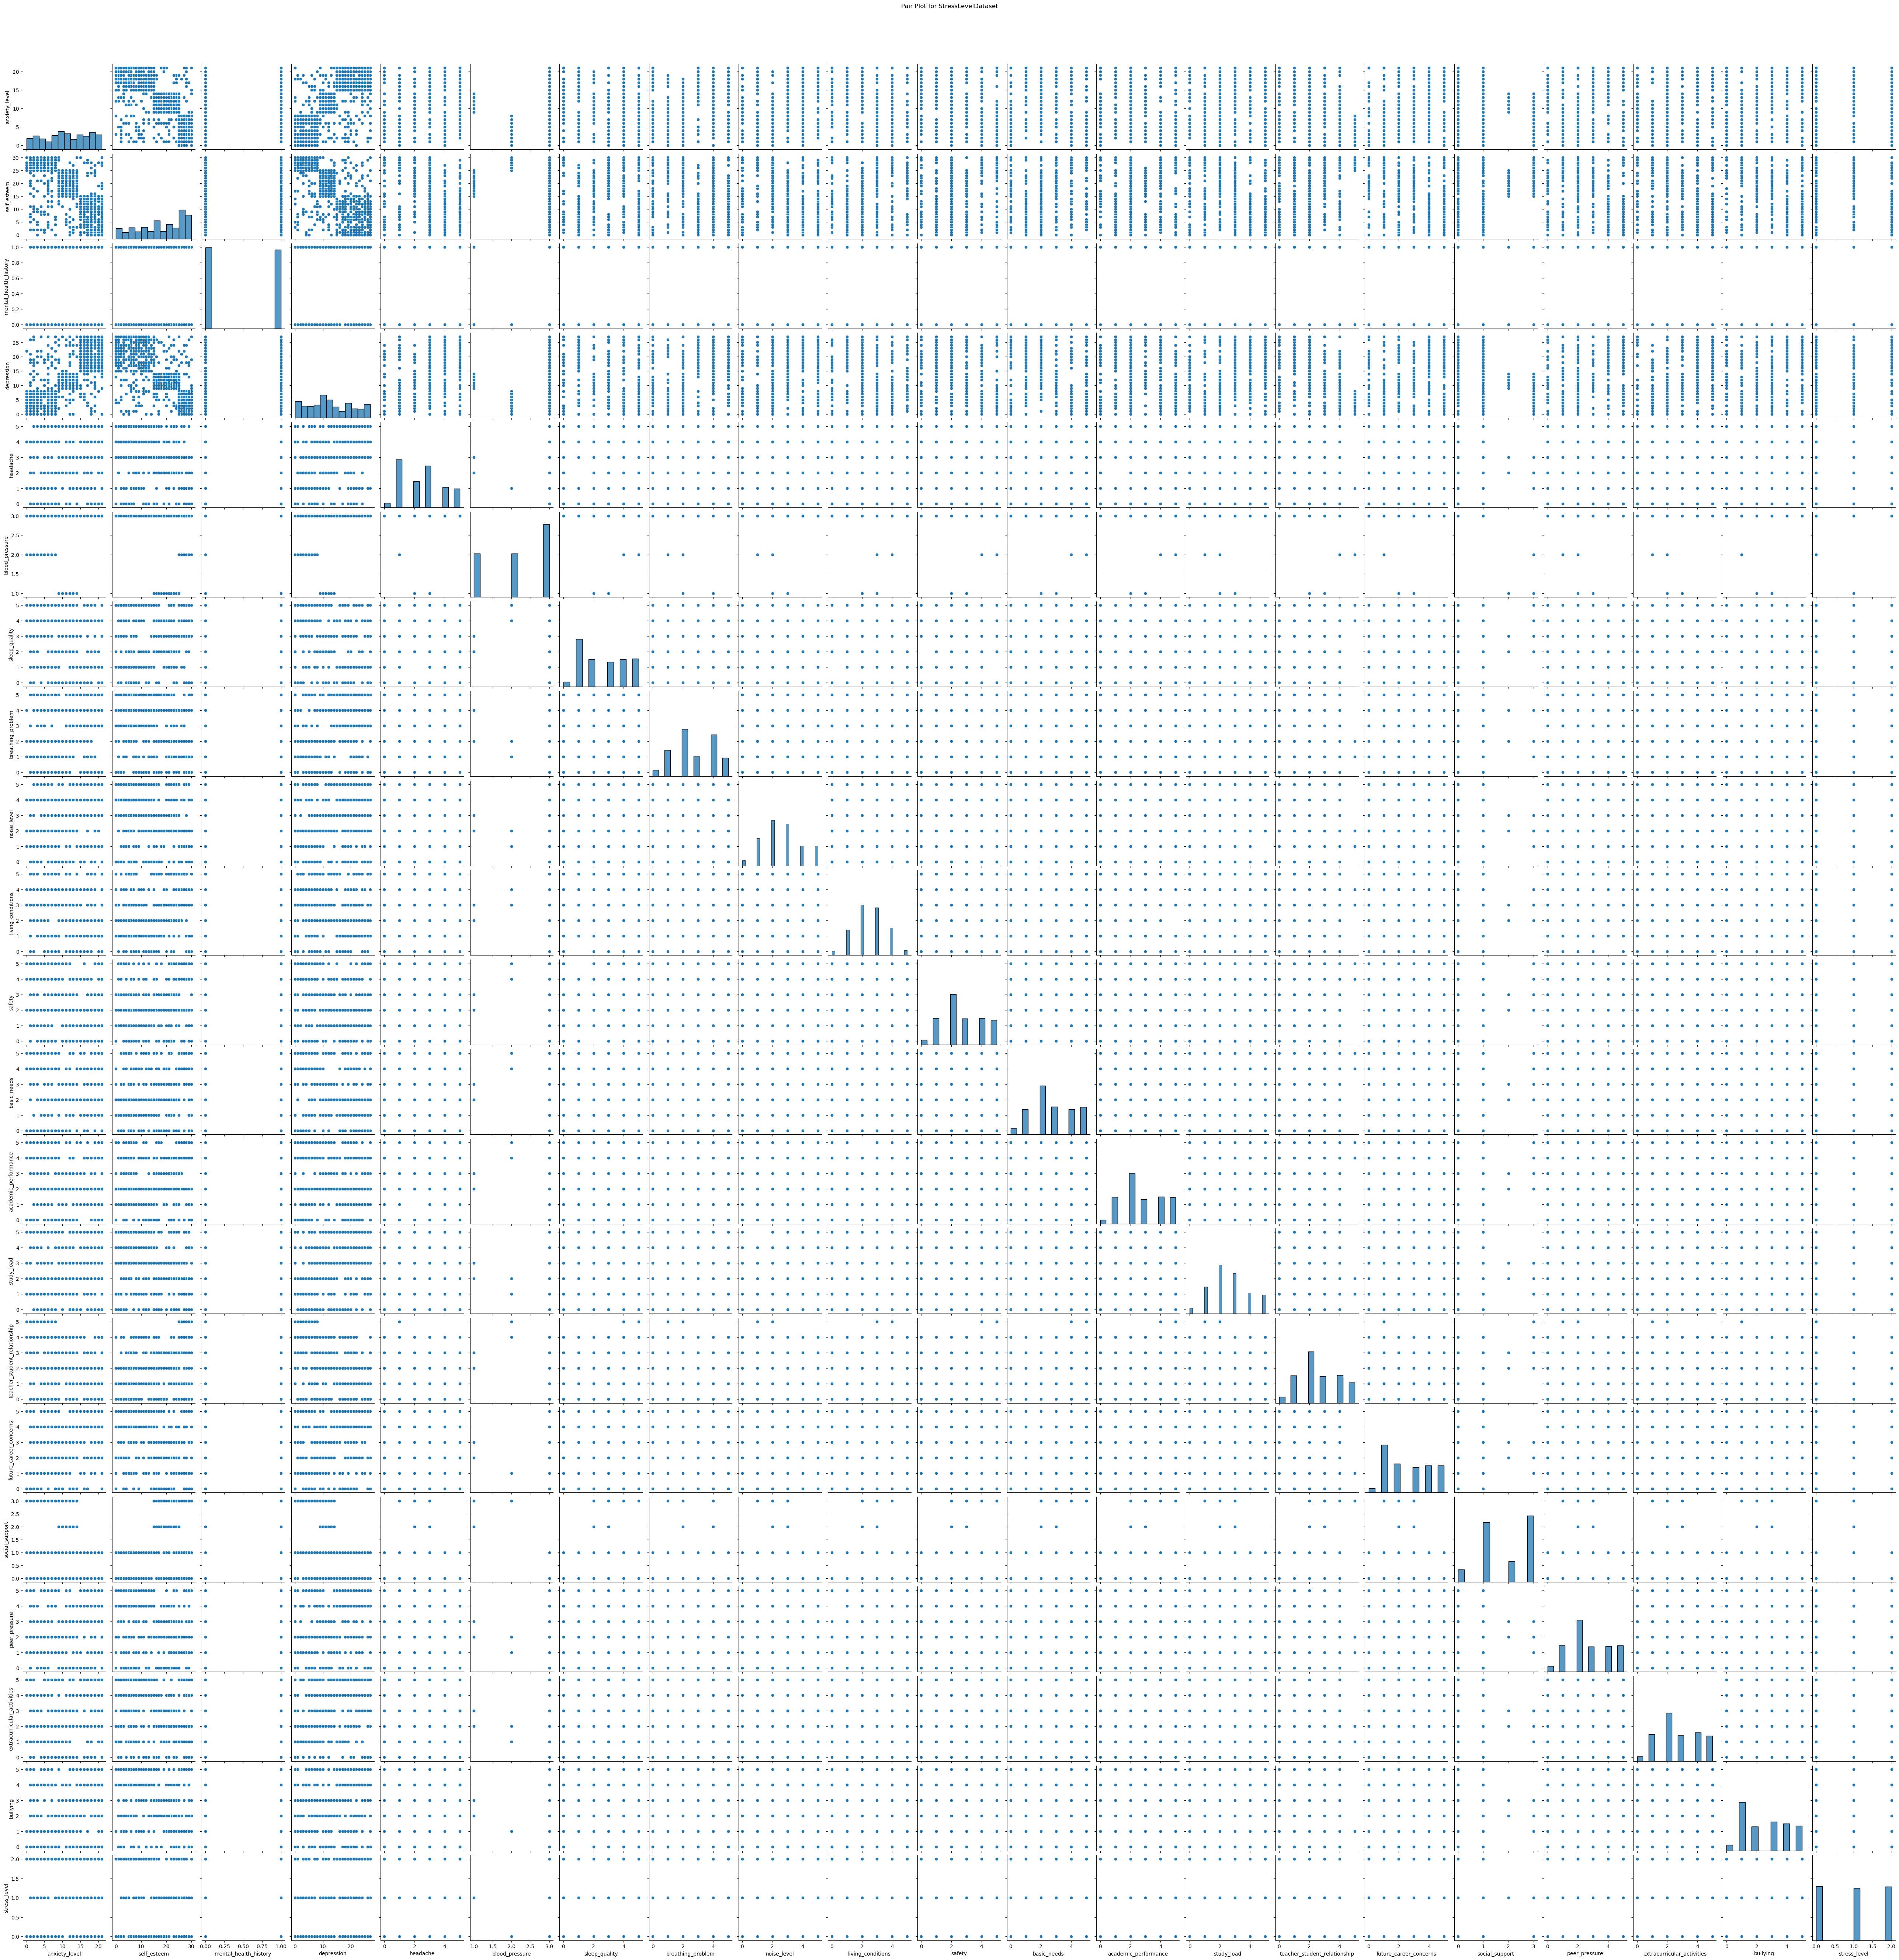

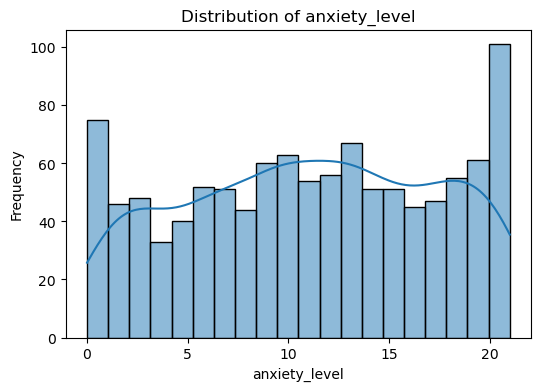

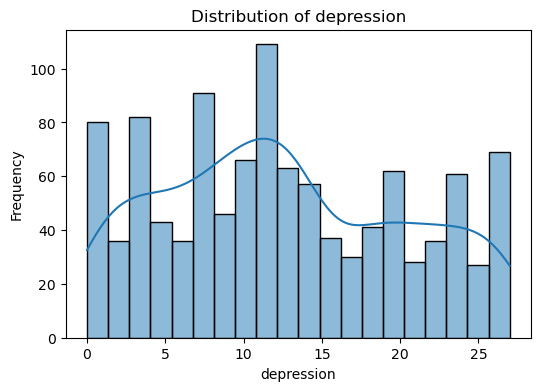

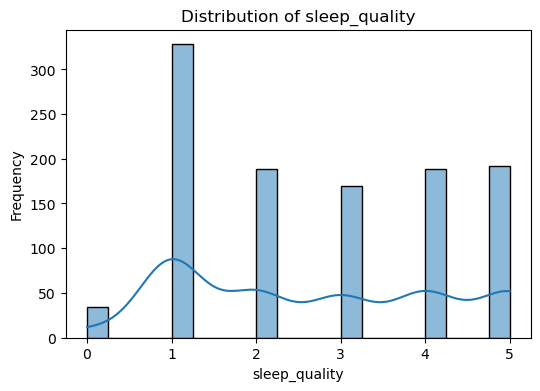

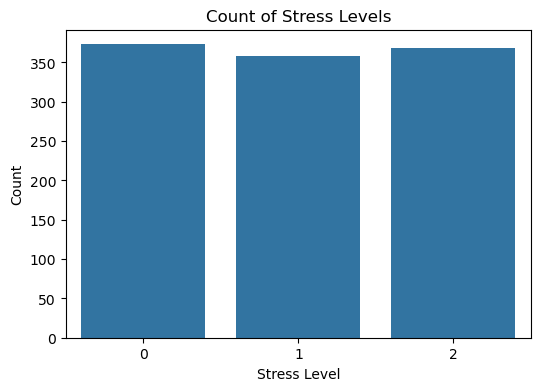

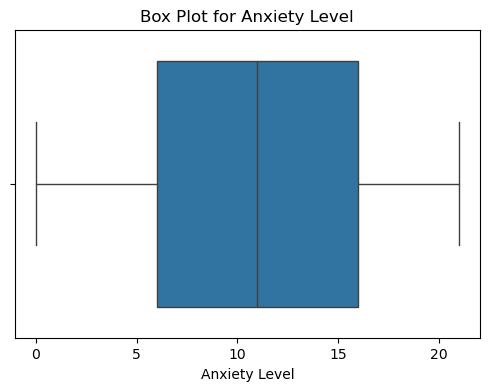

In [21]:
# Select only numeric columns
numeric_df = stress_df1.select_dtypes(include=[np.number])

# Pair Plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot for StressLevelDataset', y=1.02)
plt.show()

# Histogram for a selection of features
features_to_plot = ['anxiety_level', 'depression', 'sleep_quality']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(stress_df1[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
# Count Plot (akin to a pie chart for categorical distributions) for stress_level
plt.figure(figsize=(6,4))
sns.countplot(x='stress_level', data=stress_df1)
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# Box Plot for anxiety_level
plt.figure(figsize=(6,4))
sns.boxplot(x=stress_df1['anxiety_level'])
plt.title('Box Plot for Anxiety Level')
plt.xlabel('Anxiety Level')
plt.show()

## Predictive Modeling

In [36]:
# Prepare the data for modeling
target = 'stress_level'
features = stress_df1.columns.drop(target)

X = stress_df1[features]
y = stress_df1[target]

# Split into training and testing datasets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.4f}')

Prediction Accuracy: 0.8727


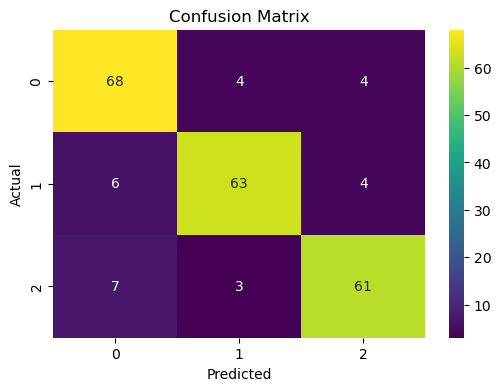

In [49]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



### Model performs very well, with high precision, recall, and F1-scores across all three classes. Accuracy is solid at 87%, and there's no major imbalance between classes

In [56]:
# Permutation Importance (a rough barh plot using feature importances from the Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

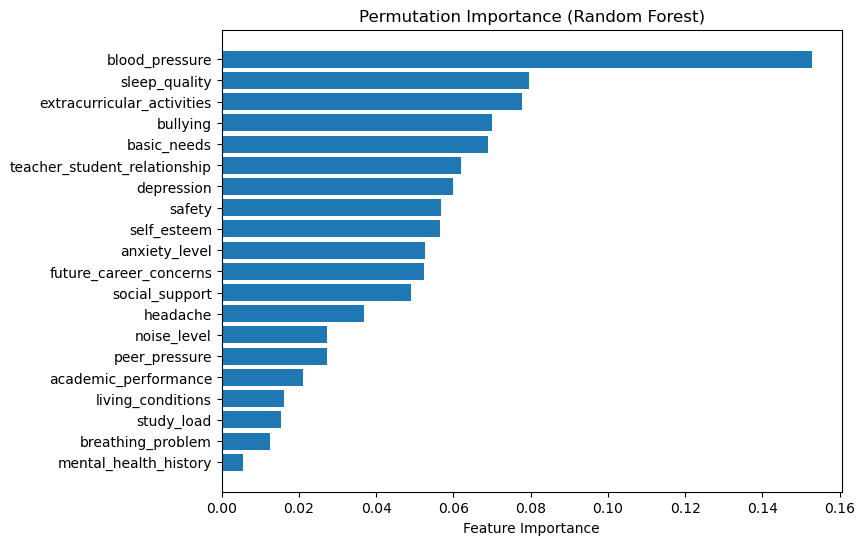

In [57]:
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Permutation Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()